In [1]:
#basic
import pandas as pd
import numpy as np

#visualizaiton
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

try:
    if platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
        rc('font', family = font_name)
    
    else:
        rc('font', family='AppleGothic')
    
except :
    pass

%matplotlib inline

import seaborn as sns

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#modeling
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns' , 100)

In [2]:
trainset = pd.read_csv('data/train.csv')
testset = pd.read_csv('data/test.csv')

In [3]:
trainset.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
testset.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


### 컬럼 확인

In [5]:
print('Train dataset(rows, cols):', trainset.shape, '\nTest dataset(rows,cols):', testset.shape)

Train dataset(rows, cols): (595212, 59) 
Test dataset(rows,cols): (892816, 58)


In [6]:
print('Columns in train and not in test dataset:', set(trainset.columns) - set(testset.columns))

Columns in train and not in test dataset: {'target'}


## Introduction of metadata
> - use : input, ID, target
> - type : nominal, interval, ordinal, binary
> - preserve : True or False
> - data Type : int, float, char
> - category : ind, reg, car, calc

In [7]:
data = []
for feature in trainset.columns:
    # Defining the role
    if feature == 'target':
        use = 'target'
    elif feature == 'id':
        use = 'id'
    else:
        use = 'input'
         
    # Defining the type

    if 'bin' in feature or feature == 'target':
        type = 'binary'
    elif 'cat' in feature or feature == 'id':
        type = 'categorical'
    elif trainset[feature].dtype == float or isinstance(trainset[feature].dtype, float):
        type = 'real'
    elif trainset[feature].dtype == 'int64':
        type = 'integer'
        
    # Initialize preserve to True for all variables except for id
    preserve = True
    if feature == 'id':
        preserve = False
    
    # Defining the data type 
    dtype = trainset[feature].dtype
    
    category = 'none'
    # Defining the category
    if 'ind' in feature:
        category = 'individual'
    elif 'reg' in feature:
        category = 'registration'
    elif 'car' in feature:
        category = 'car'
    elif 'calc' in feature:
        category = 'calculated'
    
    
    # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type,
        'preserve': preserve,
        'dtype': dtype,
        'category' : category
    }
    data.append(feature_dictionary)
    
metadata = pd.DataFrame(data, columns=['varname', 'use', 'type', 'preserve', 'dtype', 'category'])
metadata.set_index('varname', inplace=True)
metadata

,use,type,preserve,dtype,category
varname,,,,,
id,id,categorical,False,int64,none
target,target,binary,True,int64,none
ps_ind_01,input,integer,True,int64,individual
ps_ind_02_cat,input,categorical,True,int64,individual
ps_ind_03,input,integer,True,int64,individual
ps_ind_04_cat,input,categorical,True,int64,individual
ps_ind_05_cat,input,categorical,True,int64,individual
ps_ind_06_bin,input,binary,True,int64,individual
ps_ind_07_bin,input,binary,True,int64,individual


In [8]:
metadata[(metadata['type'] == 'categorical') & (metadata['preserve'] == True)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [9]:
pd.DataFrame({'count' : metadata.groupby(['category'])['category'].count()}).reset_index()

,category,count
0,calculated,20
1,car,16
2,individual,18
3,none,2
4,registration,3


In [10]:
pd.DataFrame({'count':metadata['category'].value_counts()})

,count
calculated,20
individual,18
car,16
registration,3
none,2


## Data analysis and statistics

### Target variable

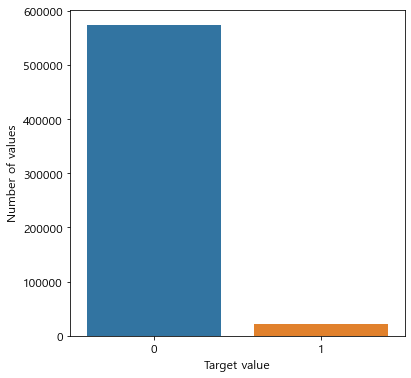

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
x = trainset['target'].value_counts().index.values
y = trainset['target'].value_counts().values

sns.barplot(ax=ax, x=x, y=y)
plt.ylabel('Number of values', fontsize=12)
plt.xlabel('Target value', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

## Real features

In [12]:
variable = metadata[(metadata['type'] == 'real') & (metadata['preserve'] == True)].index
trainset[variable].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_reg_03,595212.0,0.551102,0.793506,-1.000000,0.525000,0.720677,1.000000,4.037945
ps_car_12,595212.0,0.379945,0.058327,-1.000000,0.316228,0.374166,0.400000,1.264911
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.670867,0.765811,0.906190,3.720626
ps_car_14,595212.0,0.276256,0.357154,-1.000000,0.333167,0.368782,0.396485,0.636396
ps_car_15,595212.0,3.065899,0.731366,0.000000,2.828427,3.316625,3.605551,3.741657
ps_calc_01,595212.0,0.449756,0.287198,0.000000,0.200000,0.500000,0.700000,0.900000
ps_calc_02,595212.0,0.449589,0.286893,0.000000,0.200000,0.400000,0.700000,0.900000
ps_calc_03,595212.0,0.449849,0.287153,0.000000,0.200000,0.500000,0.700000,0.900000


In [13]:
pow(trainset['ps_car_12']*10,2)

0         16.00
1         10.00
2         10.00
3         14.00
4          9.99
          ...  
595207    14.00
595208    15.00
595209    15.80
595210    14.00
595211    16.00
Name: ps_car_12, Length: 595212, dtype: float64

In [14]:
pow(trainset['ps_car_15'],2)

0         13.0
1          6.0
2         11.0
3          4.0
4          4.0
          ... 
595207     7.0
595208    13.0
595209     3.0
595210    10.0
595211    14.0
Name: ps_car_15, Length: 595212, dtype: float64

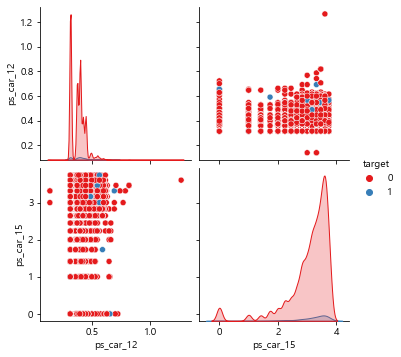

In [15]:
sample = trainset.sample(frac=0.05)
var = ['ps_car_12', 'ps_car_15', 'target']
sample = sample[var]
sns.pairplot(sample,  hue='target', palette = 'Set1', diag_kind='kde')
plt.show()

## Calculated features

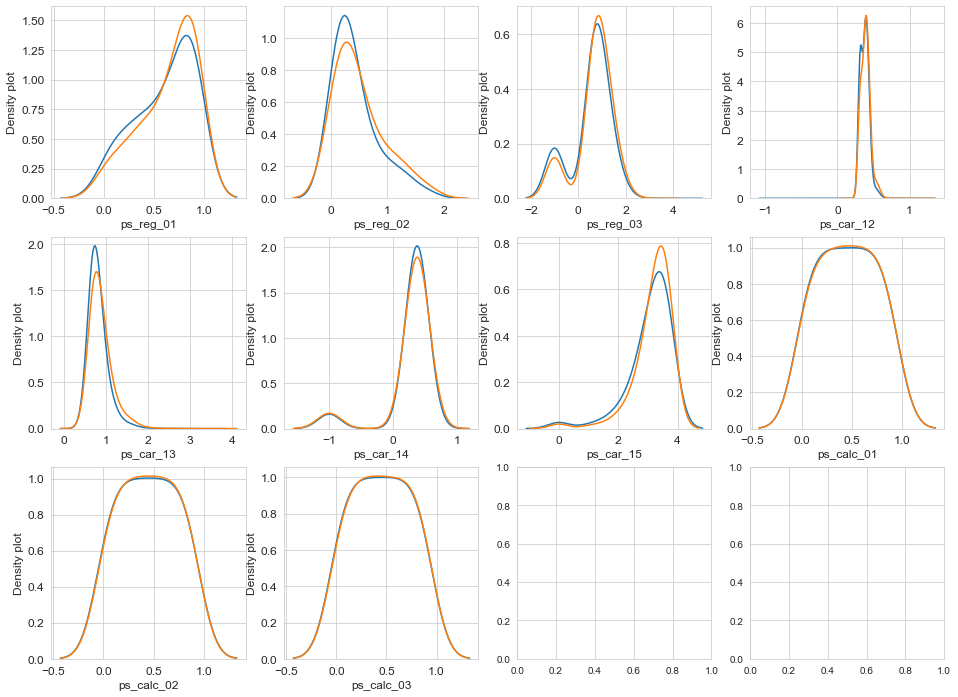

In [16]:
var = metadata[(metadata['type'] == 'real') & (metadata['preserve'])].index
i = 0
target0 = trainset.loc[trainset['target'] != 0]
target1 = trainset.loc[trainset['target'] == 0]

sns.set_style('whitegrid')
# plt.figure()
fig, ax = plt.subplots(3, 4, figsize=(16,12))


for feature in var:
    i += 1
    plt.subplot(3,4,i)
    sns.kdeplot(target1[feature], bw_method=0.5, label='target = 1')
    sns.kdeplot(target0[feature], bw_method=0.5, label='target = 0')
    plt.ylabel('Density plot' , fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Real features

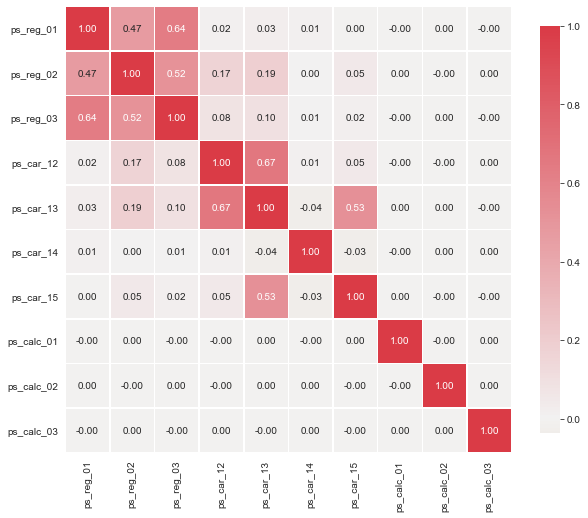

In [17]:
def corr_heatmap(var):
    correlations = trainset[var].corr()
    
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center = 0, fmt='.2f',
               square =True, linewidths=.5, annot=True, cbar_kws={'shrink' : .75})
    
    plt.show()

var = metadata[(metadata['type'] == 'real') & (metadata['preserve'])].index
corr_heatmap(var)

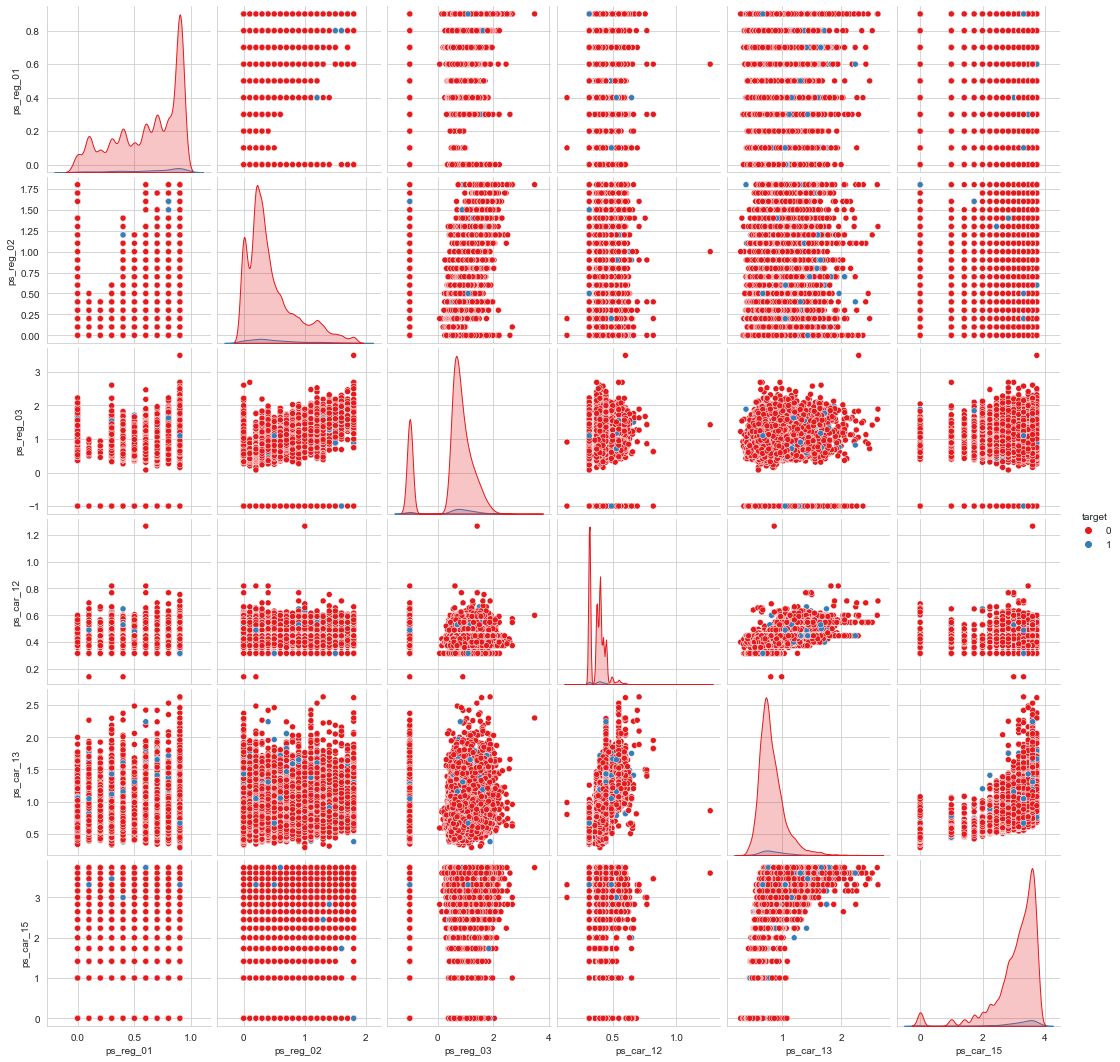

In [18]:
sample = trainset.sample(frac=0.05)
var = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_15', 'target']
sample = sample[var]
sns.pairplot(sample,  hue='target', palette = 'Set1', diag_kind='kde')
plt.show()

### Binary features

In [19]:
v = metadata[(metadata['type'] == 'binary') & (metadata['preserve'])].index
trainset[v].describe().T

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.0,0.0,0.0,0.0,1.0
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0


<ipython-input-20-d9264923d08e>:20: UserWarning: Legend does not support <AxesSubplot:xlabel='Binary features', ylabel='Percent of zero/one[%]'> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles = [p1, p2])


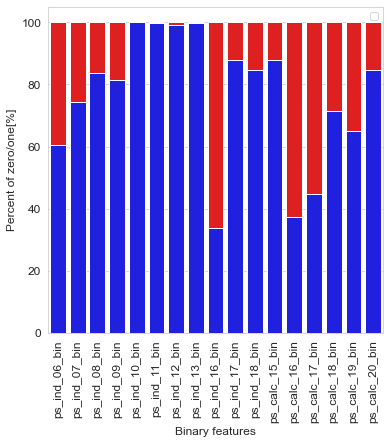

In [20]:
bin_col = [col for col in trainset.columns if '_bin' in col]
zero_list = []
one_list = []

for col in bin_col:
    zero = (trainset[col] == 0).sum() / trainset.shape[0] * 100
    one = (trainset[col] == 1).sum() / trainset.shape[0] * 100
    zero_list.append(zero)
    one_list.append(one)

fig, ax = plt.subplots(figsize=(6,6))

p1 = sns.barplot(ax=ax, x=bin_col, y= zero_list, color='blue',label='zero')
p2 = sns.barplot(ax=ax, x=bin_col, y= one_list, bottom = zero_list,color='red', label='one')
plt.ylabel('Percent of zero/one[%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(handles = [p1, p2])
plt.show()

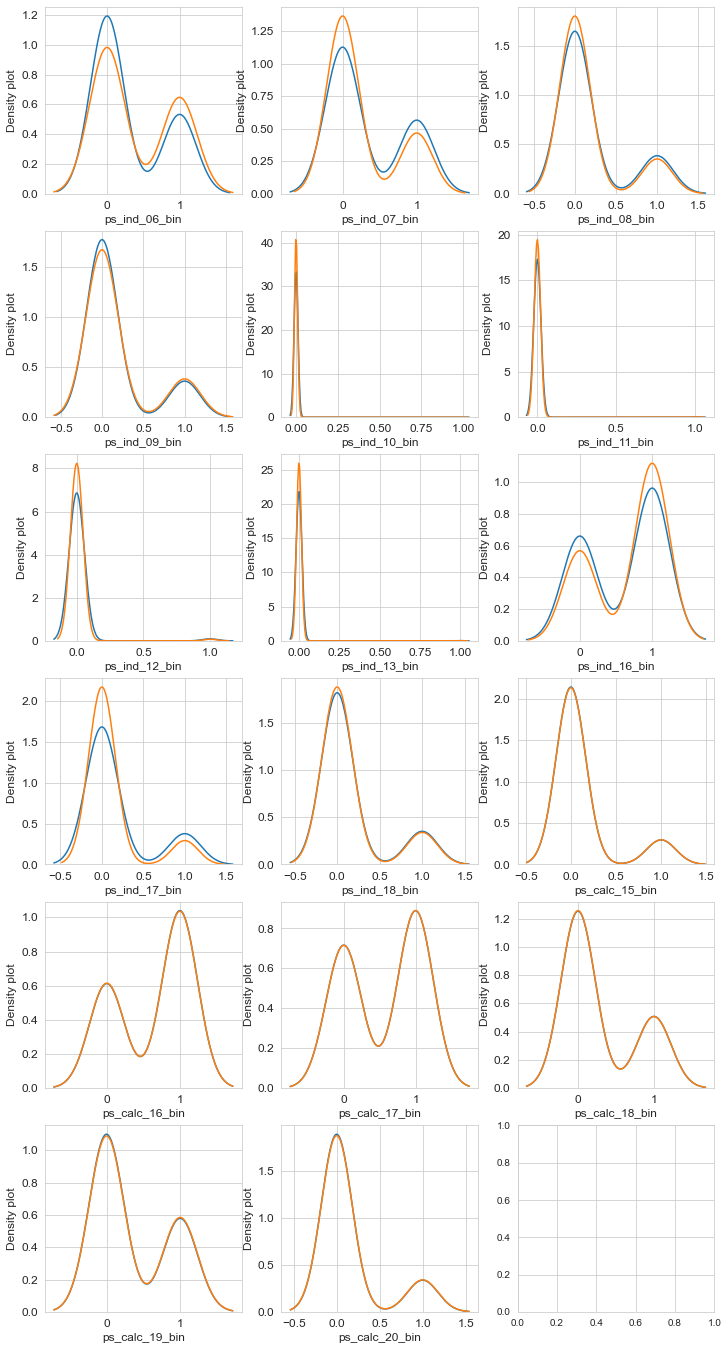

In [21]:
var = metadata[(metadata['type'] == 'binary')& metadata['preserve']].index
var = [col for col in trainset.columns if '_bin' in col]
i = 0

target1 = trainset.loc[trainset['target'] != 0]
target0 = trainset.loc[trainset['target'] == 0]

sns.set_style('whitegrid')

fig, ax = plt.subplots(6,3,figsize=(12,24))

for feature in var:
    i += 1
    plt.subplot(6,3,i)
    sns.kdeplot(target1[feature], bw_method=0.5, label='target = 1')
    sns.kdeplot(target0[feature], bw_method=0.5, label='target = 0')
    plt.ylabel('Density plot' , fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Categorical features

In [22]:
var = metadata[(metadata['type'] == 'categorical') & (metadata['preserve'])].index

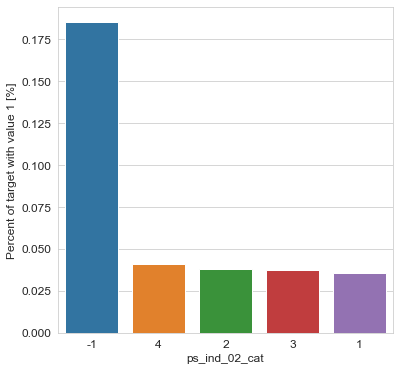

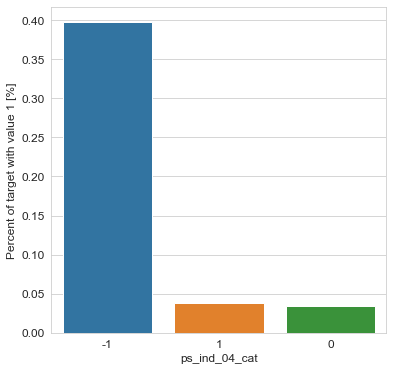

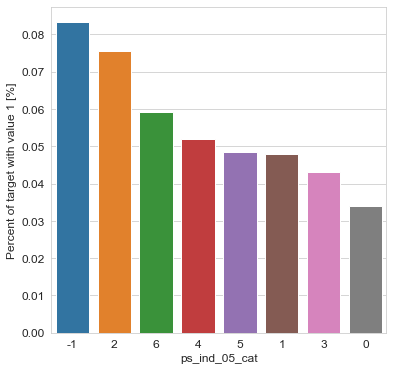

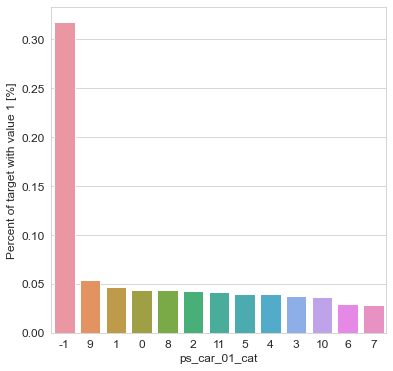

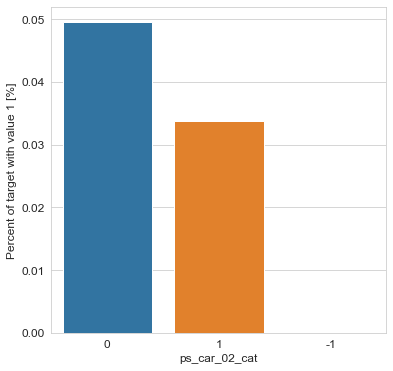

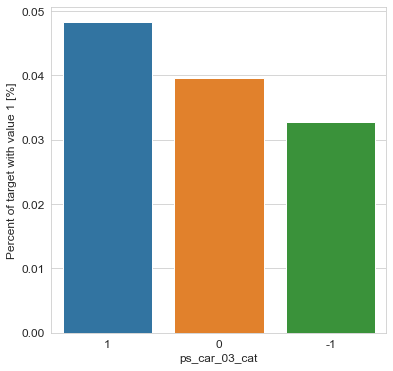

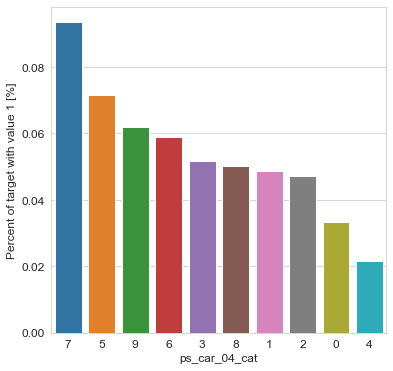

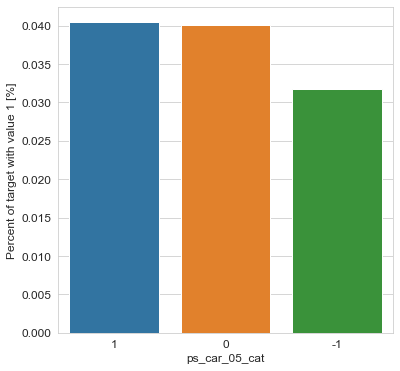

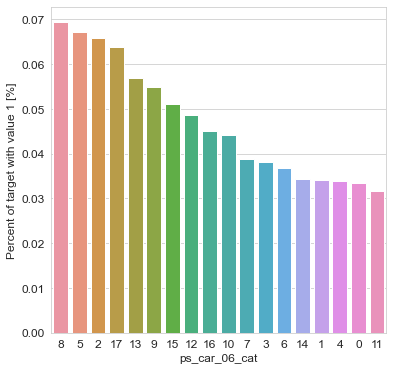

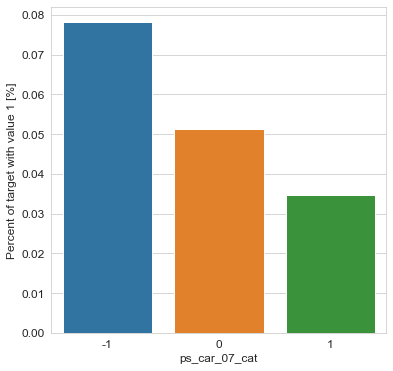

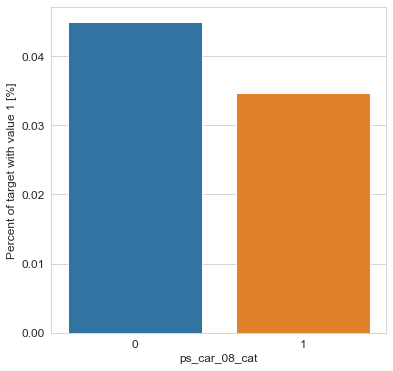

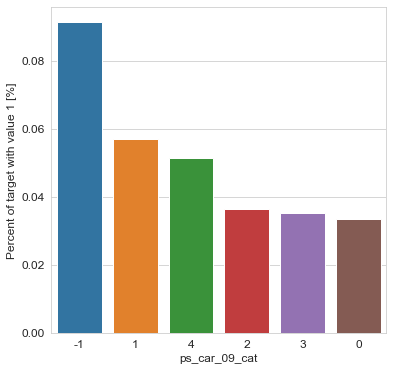

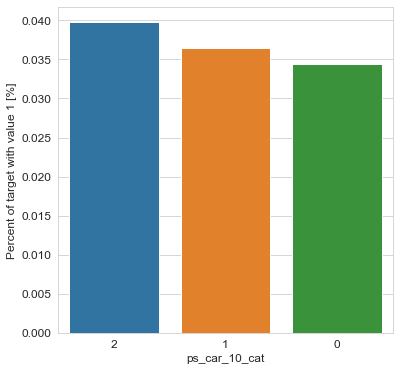

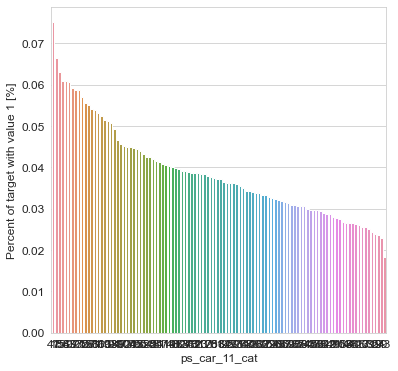

In [23]:
for feature in var:
    fig, ax = plt.subplots(figsize=(6,6))
    
    cat_perc = trainset[[feature, 'target']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    sns.barplot(ax=ax, x=feature, y='target', data=cat_perc, order=cat_perc[feature])
    plt.ylabel('Percent of target with value 1 [%]', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

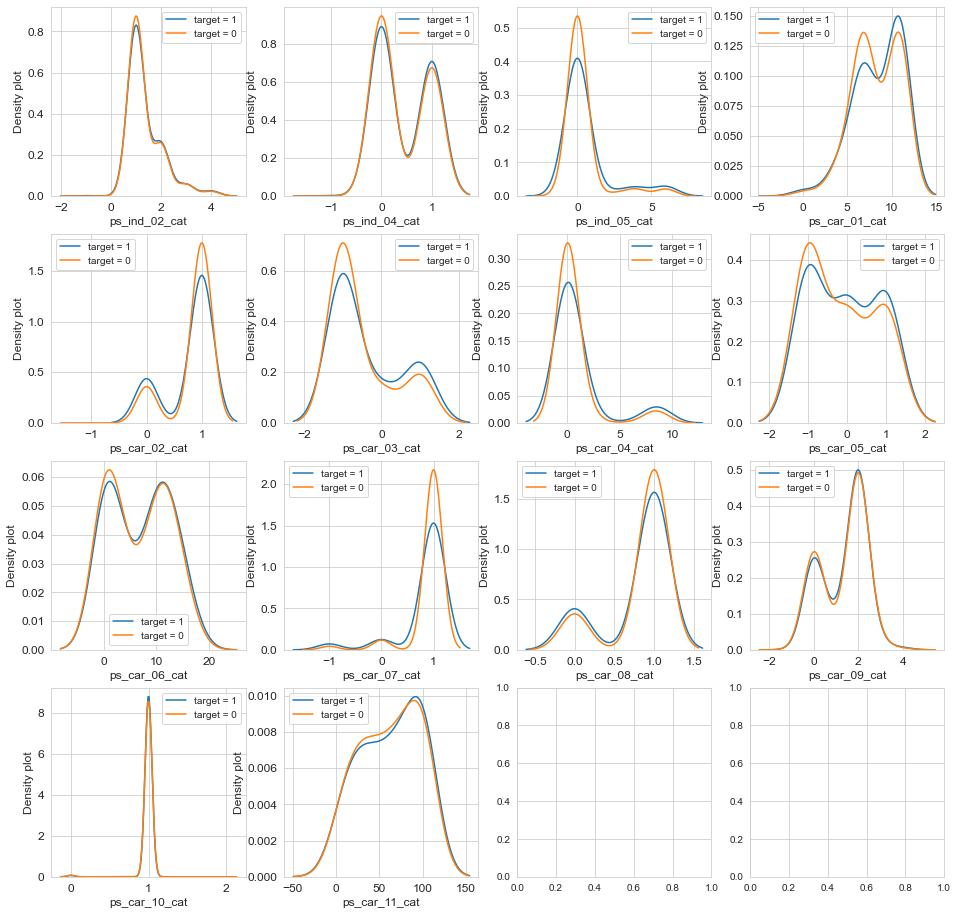

In [24]:
var = metadata[(metadata['type'] == 'categorical') & (metadata['preserve'])].index
i = 0
t1 = trainset.loc[trainset['target'] != 0]
t0 = trainset.loc[trainset['target'] == 0]

sns.set_style('whitegrid')

fig, ax = plt.subplots(4,4, figsize=(16,16))

for feature in var:
    i += 1
    plt.subplot(4,4,i)
    sns.kdeplot(t1[feature], bw_method = 0.5, label='target = 1')
    sns.kdeplot(t0[feature], bw_method = 0.5, label='target = 0')
    plt.ylabel('Density plot' , fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()

plt.show()

## Data unbalance between train and test data

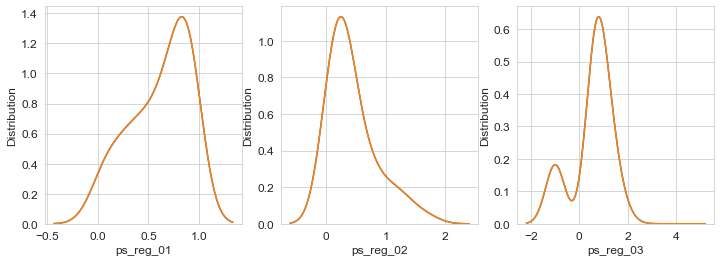

In [25]:
var = metadata[(metadata['category'] == 'registration') & (metadata['preserve'])].index

sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 3, figsize=(12,4))
i = 0

for feature in var:
    i+=1
    
    plt.subplot(1,3,i)
    sns.kdeplot(trainset[feature], bw_method=0.5, label='train')
    sns.kdeplot(trainset[feature], bw_method=0.5, label='test')
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

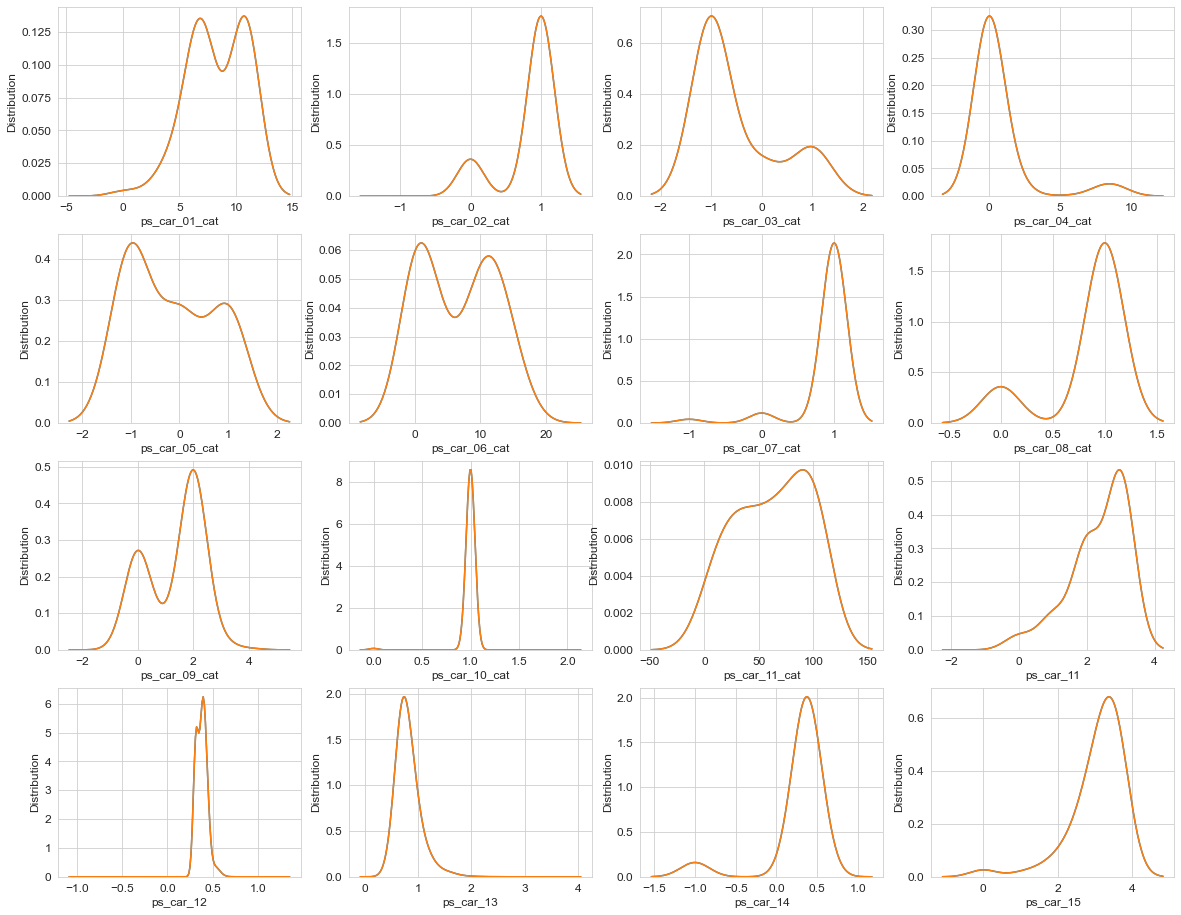

In [26]:
var = metadata[(metadata['category'] == 'car') & (metadata['preserve'])].index

sns.set_style('whitegrid')

fig, ax = plt.subplots(4,4,figsize=(20,16))
i = 0

for feature in var:
    i = i + 1
    plt.subplot(4,4,i)
    
    sns.kdeplot(trainset[feature], bw_method=0.5, label='train')
    sns.kdeplot(trainset[feature], bw_method=0.5, label='test')
    
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    
    locs, labels = plt.xticks()
    
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

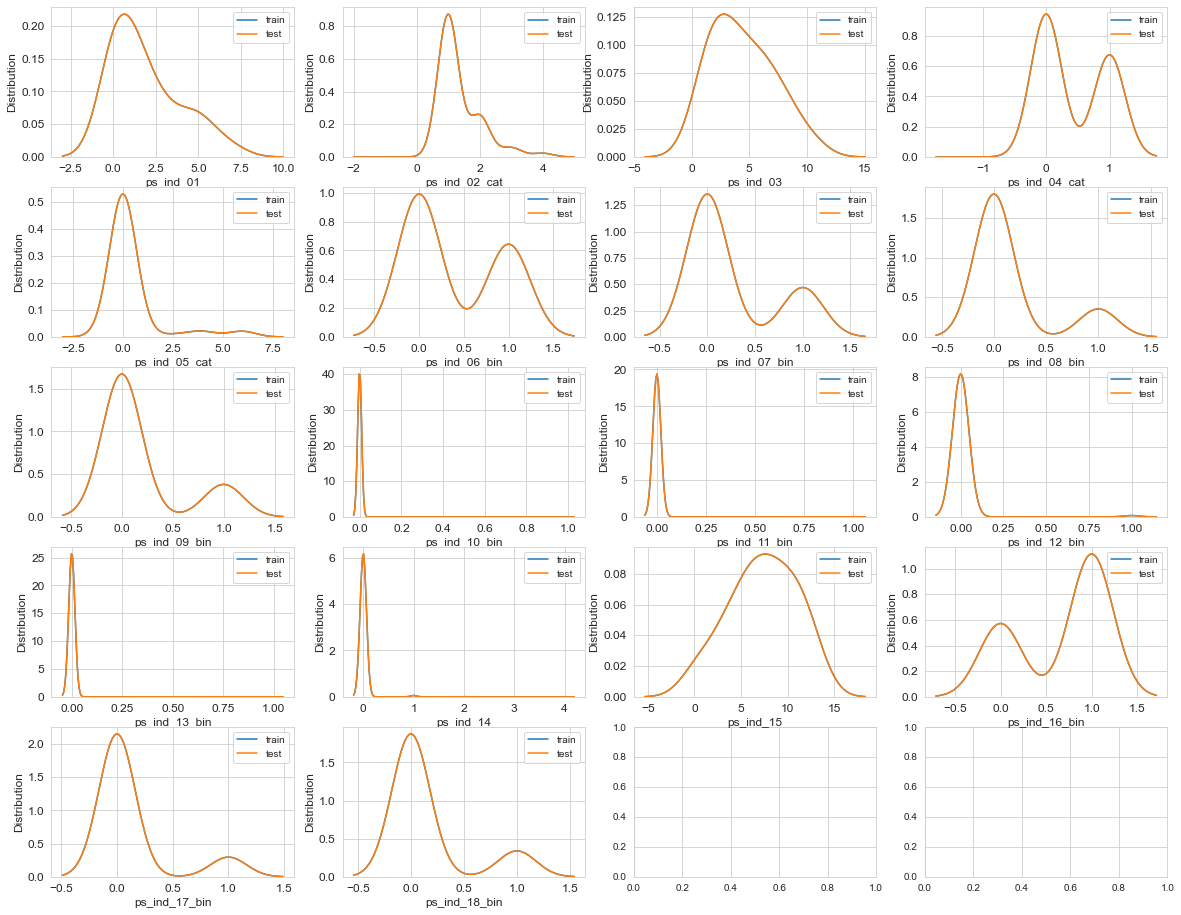

In [27]:
var = metadata[(metadata['category'] == 'individual') & (metadata['preserve'])].index

sns.set_style('whitegrid')

fig, ax = plt.subplots(5,4,figsize=(20,16))
i = 0

for feature in var:
    i += 1
    
    plt.subplot(5,4,i)
    sns.kdeplot(trainset[feature], bw_method=0.5, label='train')
    sns.kdeplot(trainset[feature], bw_method=0.5, label='test')
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()

plt.show()

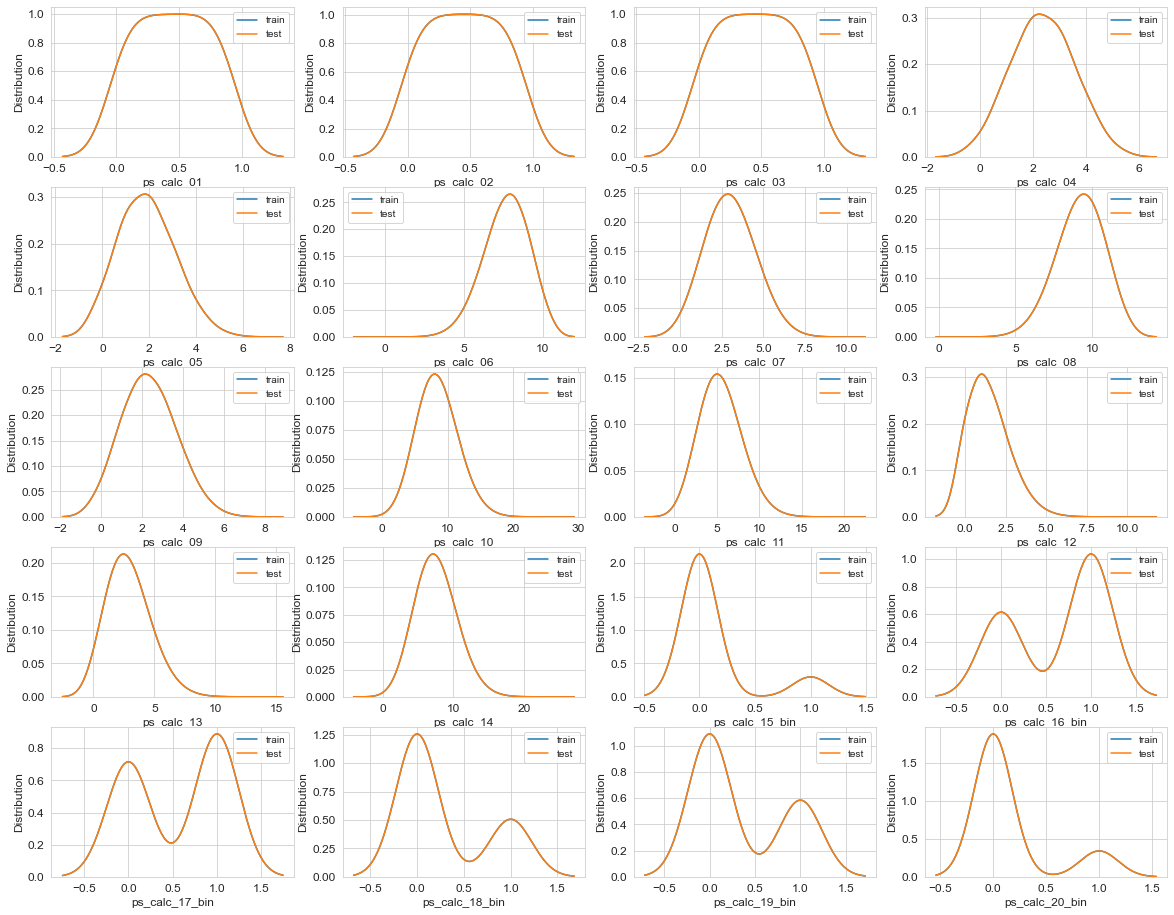

In [28]:
var = metadata[(metadata['category'] == 'calculated') & (metadata['preserve'])].index

sns.set_style('whitegrid')

fig, ax = plt.subplots(5, 4, figsize=(20,16))
i = 0

for feature in var:
    i += 1
    
    plt.subplot(5,4,i)
    sns.kdeplot(trainset[feature], bw_method=0.5, label='train')
    sns.kdeplot(trainset[feature], bw_method=0.5, label='test')
    plt.ylabel('Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()

plt.show()

## Check data quality

In [29]:
vars_with_missing = []

for feature in trainset.columns:
    missings = trainset[trainset[feature] == -1][feature].count()
    if missings > 0:
        vars_with_missing.append(feature)
        missings_perc = missings/trainset.shape[0]
        
        print('Variable {} has {} regords ({:.2%}) with missing values'.format(feature, missings, missings_perc))
        

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 regords (0.04%) with missing values
Variable ps_ind_04_cat has 83 regords (0.01%) with missing values
Variable ps_ind_05_cat has 5809 regords (0.98%) with missing values
Variable ps_reg_03 has 107772 regords (18.11%) with missing values
Variable ps_car_01_cat has 107 regords (0.02%) with missing values
Variable ps_car_02_cat has 5 regords (0.00%) with missing values
Variable ps_car_03_cat has 411231 regords (69.09%) with missing values
Variable ps_car_05_cat has 266551 regords (44.78%) with missing values
Variable ps_car_07_cat has 11489 regords (1.93%) with missing values
Variable ps_car_09_cat has 569 regords (0.10%) with missing values
Variable ps_car_11 has 5 regords (0.00%) with missing values
Variable ps_car_12 has 1 regords (0.00%) with missing values
Variable ps_car_14 has 42620 regords (7.16%) with missing values
In total, there are 13 variables with missing values


## Prepare the data for model

### Drop calc columns

In [30]:
col_to_drop = trainset.columns[trainset.columns.str.startswith('ps_calc_')]
trainset = trainset.drop(col_to_drop, axis=1)
testset = testset.drop(col_to_drop, axis=1)

### Drop variables with too many missing values

In [31]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
trainset.drop(vars_to_drop, inplace=True, axis=1)
testset.drop(vars_to_drop, inplace=True, axis=1)
metadata.loc[(vars_to_drop), 'keep'] =False

In [32]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                tst_series = None,
                 target = None,
                 min_samples_leaf = 1,
                 smoothing=1,
                 noise_level=0):
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    
    temp = pd.concat([trn_series, target], axis=1)
    
    #Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    
    #Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    
    #Apply average function to all target data
    prior = target.mean()
    
    #The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    
    #Apply averages to trn and tst series
    ft_trn_series = pd.merge(
                    trn_series.to_frame(trn_series.name),
                    averages.reset_index().rename(columns={'index' : target.name, target.name:'average'}),
                    on = trn_series.name,
                    how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    #pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
            tst_series.to_frame(tst_series.name),
            averages.reset_index().rename(columns={'index' : target.name, target.name:'average'}),
            on=tst_series.name,
            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level) , add_noise(ft_tst_series, noise_level)
    
    

In [33]:
train_encoded, test_encoded = target_encode(trainset['ps_car_11_cat'],
                                            testset['ps_car_11_cat'],
                                            target = trainset['target'],
                                            min_samples_leaf = 100,
                                            smoothing = 10,
                                            noise_level = 0.01)

In [34]:
trainset['ps_car_11_cat_te'] = train_encoded
trainset.drop('ps_car_11_cat', axis=1, inplace=True)
metadata.loc['ps_car_11_cat', 'keep'] = False
testset['ps_car_11_cat_te'] =test_encoded
testset.drop('ps_car_11_cat', axis=1, inplace=True)

### Balance target variable

In [36]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = trainset[trainset.target == 0].index
idx_1 = trainset[trainset.target == 1].index

# Get original number of records per target value
nb_0 = len(trainset.loc[idx_0])
nb_1 = len(trainset.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# # Randomly select records with target=0 to get at the desired a priori
undersample_0 = trainset[trainset['target'] == 0].sample(n=undersampled_nb_0)
trainset = pd.concat([undersample_0,trainset[trainset.target == 1]])
trainset = trainset.sample(frac=1).reset_index(drop=True)
trainset

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_car_11_cat_te
0,273021,1,2,1,4,0,0,1,0,0,0,0,0,0,0,0,3,0,0,1,0.6,0.1,0.481534,7,1,0,14,1,1,2,1,3,0.316070,0.605468,0.365103,2.645751,0.025936
1,174479,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,6,0,0,1,0.7,0.3,0.692820,6,1,0,11,1,1,0,1,1,0.423792,0.417811,0.386782,0.000000,0.044466
2,590919,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,8,1,0,0,0.6,0.6,0.699553,4,1,0,7,1,0,0,1,2,0.387298,0.992503,0.390000,3.741657,0.045050
3,137056,0,4,4,11,1,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.2,0.579332,7,1,0,0,1,1,1,1,3,0.316228,0.698907,0.361525,3.162278,0.031369
4,403729,1,0,1,6,1,6,0,1,0,0,0,0,0,0,0,11,1,0,0,0.7,0.5,1.445683,11,1,0,0,1,1,2,1,3,0.316228,0.645423,0.294449,3.000000,0.024324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,122628,0,0,1,5,1,0,0,1,0,0,0,0,0,0,0,8,0,0,1,0.3,0.0,0.921954,11,1,1,16,1,1,2,1,3,0.400000,0.978350,0.373095,3.464102,0.045632
216936,1474081,1,0,1,7,1,2,0,1,0,0,0,0,0,0,0,8,0,1,0,0.4,0.0,0.840015,8,1,0,1,1,1,2,1,3,0.316228,0.661047,0.289828,3.464102,0.030064
216937,782310,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.4,0.0,0.423527,7,1,0,0,1,0,2,1,3,0.316228,0.808682,0.294449,3.741657,0.031801
216938,531166,0,1,1,8,1,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.9,0.5,0.972111,11,1,0,4,1,1,2,1,3,0.316228,0.680772,0.374833,3.464102,0.030186


<AxesSubplot:>

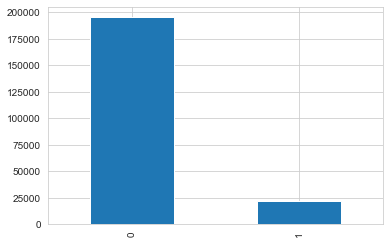

In [37]:
trainset['target'].value_counts().plot(kind='bar')

In [38]:
trainset = trainset.replace(-1, np.nan)
testset = testset.replace(-1, np.nan)

### Dummify cat values

In [39]:
cat_features = [a for a in trainset.columns if a.endswith('cat')]
cat_features

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat']

In [40]:
for col in cat_features:
    temp = pd.get_dummies(pd.Series(trainset[col]))
    trainset = pd.concat([trainset, temp], axis=1)
    trainset = trainset.drop([col],axis=1)

In [41]:
for col in cat_features:
    temp = pd.get_dummies(pd.Series(testset[col]))
    testset = pd.concat([testset, temp], axis=1)
    testset = testset.drop([col],axis=1)

### Drop unused and target columns

In [42]:
id_test = testset['id'].values
target_train = trainset['target'].values

trainset = trainset.drop(['target', 'id'], axis=1)
testset = testset.drop(['id'], axis=1)

In [43]:
print('Train dataset (rows, cols):', trainset.values.shape, '\nTest dataset (rows, cols):' ,testset.values.shape)

Train dataset (rows, cols): (216940, 91) 
Test dataset (rows, cols): (892816, 91)


### Prepare the model

In [49]:
class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models
        
    def fit_predict(self, X,y,T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        
        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=235).split(X,y))
        
        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        
        for i, clf in enumerate(self.base_models):
            
            S_test_i = np.zeros((T.shape[0], self.n_splits))
            
            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                print('Base model %d: fit %s model | fold %d' %  (i+1, str(clf).split('(')[0],j+1))
                clf.fit(X_train, y_train)
                cross_score = cross_val_score(clf, X_train, y_train, cv=3, scoring = 'roc_auc')
                print('cross_score[roc-auc]: %.5f[gini]:%.5f' % (cross_score.mean(), 2*cross_score.mean() -1))
                y_pred = clf.predict_proba(X_holdout)[:,1]
                S_train[test_idx, i] = y_pred
                S_test_i[:,j] = clf.predict_proba(T)[:,1]
            
            S_test[:,i] = S_test_i.mean(axis=1)
            
        results = cross_val_score(self.stacker, S_train, y, cv=3, scoring='roc_auc')
        
        print('Stacker score [gini]: %.5f' % (2 * results.mean() -1))
        
        self.stacker.fit(S_train, y)
        res = self.stacker.predict_proba(S_test)[:,1]
        return res

In [45]:
#lgb_1
lgb_params1 = {}
lgb_params1['learning_rate'] = 0.02
lgb_params1['n_estimators'] = 650
lgb_params1['max_bin'] = 10
lgb_params1['subsample'] = 0.8
lgb_params1['subsample_freq'] = 10
lgb_params1['colsample_bytree'] = 0.8
lgb_params1['min_child_samples'] = 500
lgb_params1['seed'] = 235
lgb_params1['num_threads'] = 4

# lgb2
lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['seed'] = 235
lgb_params2['num_threads'] = 4

# lgb3
lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['seed'] = 235
lgb_params3['num_threads'] = 4

# XGBoost params
xgb_params = {}
xgb_params['objective'] = 'binary:logistic'
xgb_params['learning_rate'] = 0.04
xgb_params['n_estimators'] = 490
xgb_params['max_depth'] = 4
xgb_params['subsample'] = 0.9
xgb_params['colsample_bytree'] = 0.9  
xgb_params['min_child_weight'] = 10
# xgb_params['num_threads'] = 4


In [46]:
#Base models
lgb_model1 = LGBMClassifier(**lgb_params1)

lgb_model2 = LGBMClassifier(**lgb_params2)
       
lgb_model3 = LGBMClassifier(**lgb_params3)

xgb_model = XGBClassifier(**xgb_params)

log_model = LogisticRegression()

### Initialize the ensambling object

In [50]:
stack = Ensemble(n_splits=3,
                 stacker=log_model,
                 base_models = (lgb_model1, lgb_model2, lgb_model3, xgb_model))

In [51]:
y_prediction =stack.fit_predict(trainset, target_train, testset)

Base model 1: fit LGBMClassifier model | fold 1
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
cross_score[roc-auc]: 0.63506[gini]:0.27012
Base model 1: fit LGBMClassifier model | fold 2
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
cross_score[roc-auc]: 0.64197[gini]:0.28394
Base model 1: fit LGBMClassifier model | fold 3
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Curre

C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_score[roc-auc]: 0.63493[gini]:0.26986


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Base model 4: fit XGBClassifier model | fold 2
[03:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_score[roc-auc]: 0.64117[gini]:0.28234


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Base model 4: fit XGBClassifier model | fold 3
[03:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_score[roc-auc]: 0.63657[gini]:0.27315


C:\Users\Sangho\anaconda3\envs\tfgpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Stacker score [gini]: 0.28597


In [52]:
submission = pd.DataFrame()
submission['id'] = id_test
submission['target'] = y_prediction
submission.to_csv('stacked.csv', index=False)